In [2]:
import pandas as pd
import zipfile
import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For showing plots

In [3]:
df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")

In [4]:
# to check what catchment have the highest count
catchment_count = pd.crosstab(index = df['Catchment_name'], columns='count')
print(catchment_count)

#answer: Ebro, Galiza-Norte, Minho and Tejo

col_0                  count
Catchment_name              
Algarve-Sotavento          6
Algarve-barlavento        10
Arno-Ombrone               2
Campania-South            19
Cantabrica               502
Catala                   242
Corse                      5
Douro                    401
Ebro                     736
EntreDouroeVouga           2
Galiza-Norte             709
Galiza-Sul                95
Garonne                    3
Guadalquivir              63
Guadia                   313
Italia-Veneto              1
Jucar                    103
Jucar-Ebro                52
Minho                    707
Mira                       5
Mondego                   86
Odelouca                  40
Oeste                     33
Ombrone                    5
Ombrone-Tevere             6
Rhone                     16
Sado                       9
Saline-Pescara-Sangro     29
Sardinia                  17
Segura                    42
Segura-Jucar               7
South_France_E            23
South_France_W

In [5]:
#set those four as variables
ebro = df[df['Catchment_name']=='Ebro']
galiza_norte = df[df['Catchment_name']=='Galiza-Norte']
minho = df[df['Catchment_name']=='Minho']
tejo = df[df['Catchment_name']=='Tejo']

### Stripplot

In [ ]:
plt.subplot(2,2,1)
sns.stripplot(data=ebro, y='temp_ann').set_title("Ebro")
plt.subplot(2,2,2)
sns.stripplot(data=galiza_norte, y='temp_ann').set_title("Galiza-Norte")
plt.subplot(2,2,3)
sns.stripplot(data=minho, y='temp_ann').set_title("Minho")
plt.subplot(2,2,4)
sns.stripplot(data=tejo, y='temp_ann').set_title("Tejo")

plt.show()

### Histogram

In [ ]:
plt.subplot(2,2,1)
sns.histplot(
    ebro["temp_ann"], 
    kde=True,
    stat="density",
    kde_kws=dict(cut=3),
    alpha=.4,
    edgecolor=(1, 1, 1, 0.4),
).set_title("Ebro")

plt.subplot(2,2,2)
sns.histplot(
    galiza_norte["temp_ann"], 
    kde=True,
    stat="density",
    kde_kws=dict(cut=3),
    alpha=.4,
    edgecolor=(1, 1, 1, 0.4),
).set_title("Galiza-Norte")

plt.subplot(2,2,3)
sns.histplot(
    minho["temp_ann"], 
    kde=True,
    stat="density",
    kde_kws=dict(cut=3),
    alpha=.4,
    edgecolor=(1, 1, 1, 0.4),
).set_title("Minho")

plt.subplot(2,2,4)
sns.histplot(
    tejo["temp_ann"], 
    kde=True,
    stat="density",
    kde_kws=dict(cut=3),
    alpha=.4,
    edgecolor=(1, 1, 1, 0.4),
).set_title("Tejo")

plt.show()

### Boxplot

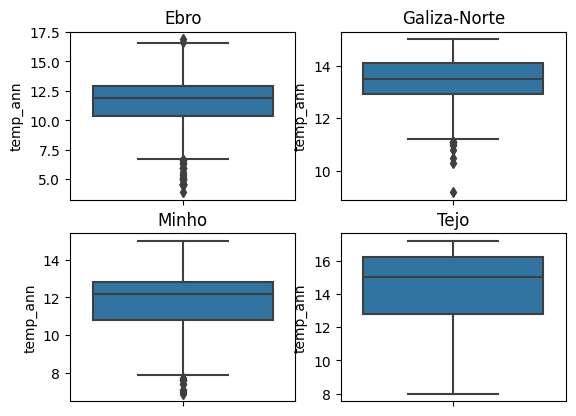

In [19]:
plt.subplot(2,2,1)
sns.boxplot(y="temp_ann", data=ebro).set_title("Ebro")

plt.subplot(2,2,2)
sns.boxplot(y="temp_ann", data=galiza_norte).set_title("Galiza-Norte")

plt.subplot(2,2,3)
sns.boxplot(y="temp_ann", data=minho).set_title("Minho")

plt.subplot(2,2,4)
sns.boxplot(y="temp_ann", data=tejo).set_title("Tejo")

plt.show()

### Part 2
#### Take 1000 random samples with replacement of increasing sample sizes (e.g. 10, 50, 100, 150, 200, 250, 300, 500 and 1000 observations), compute the mean Temp_ann of each sample and use an appropriate visualization to show how many samples will we need to have a good estimate of the population mean

<Axes: >

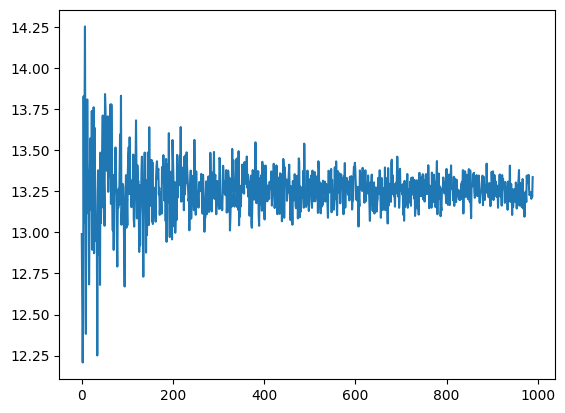

In [4]:
import random
import pandas as pd
import zipfile
import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For showing plots

df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")

mean = []
for i in range(10,1000,1):
    sample = pd.Series(random.sample(list(df['temp_ann']), i))
    mean.append(sample.mean())

sns.lineplot(mean)

#### Using an appropriate visualization, check the effect of Mean Annual Temperature (Temp_ann) on the presence of Salmo trutta fario (Brown Trout).


In [7]:
ctab = pd.crosstab(df['temp_ann'], df['Salmo trutta fario'])
print(ctab)

Salmo trutta fario  0  1
temp_ann                
3.9                 0  1
4.5                 0  4
4.6                 0  7
4.9                 0  1
5.0                 0  4
...                .. ..
17.9                5  0
18.0                5  0
18.1                2  0
18.2                6  0
18.3                4  0

[130 rows x 2 columns]


Text(0, 0.5, '')

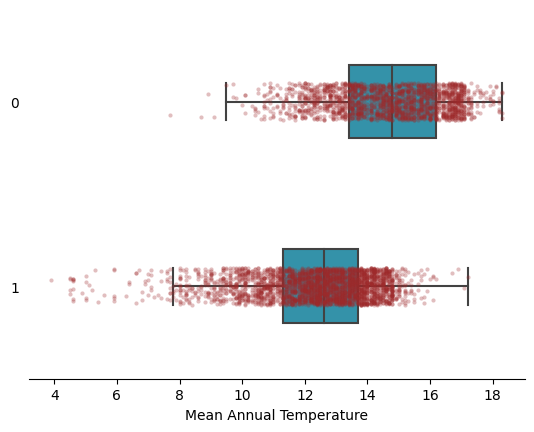

In [19]:

sns.boxplot(
    data= df,
    x='temp_ann',
    y='Salmo trutta fario',
    orient= "h",
    width=0.4,
    fliersize=0,
    color='#219ebc', # HEX color picked from here: https://coolors.co/palettes/trending - don't forget to start by "#"
    )
sns.stripplot(
    data= df,
    x='temp_ann',
    y='Salmo trutta fario',
    orient="h",
    jitter=0.1, # the ammount of jitter (i.e. random point dispersion along the x-axis).
    linewidth=0, # no line around the poits
    color='#9e2a2b', # HEX color picked from here: https://coolors.co/palettes/trending - don't forget to start by "#"
    alpha=.3,
    s=3, # point size
    )
plt.tick_params(left=False) # removes tickmarks
sns.despine(left=True)
plt.xlabel('Mean Annual Temperature')
plt.ylabel('')

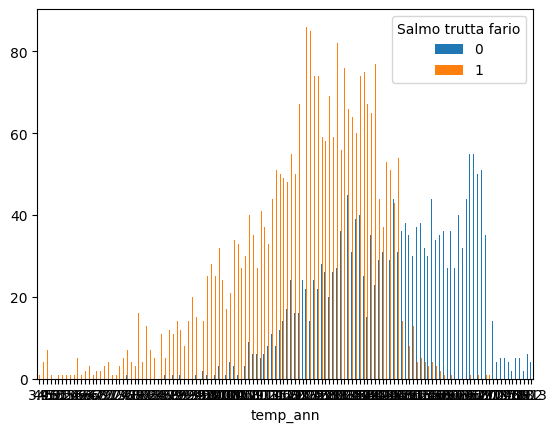

In [20]:
# Creating barplot from crosstable
barplot = ctab.plot.bar(rot=0)

Text(0, 0.5, '')

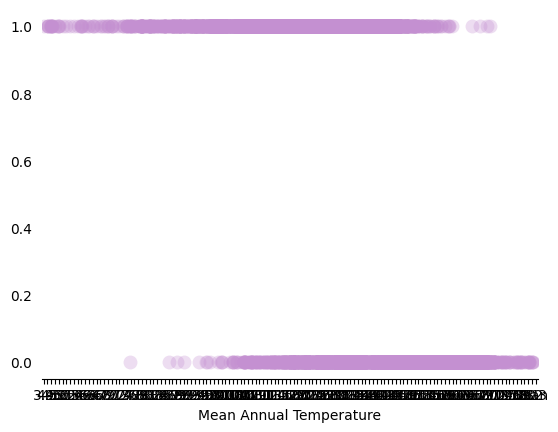

In [23]:
sns.stripplot(
    data= df,
    x='temp_ann',
    y='Salmo trutta fario',
    jitter=0.2, # the ammount of jitter (i.e. random point dispersion along the x-axis).
    linewidth=0, # no line around the poits
    color='#c490d1', # HEX color picked from here: https://coolors.co/palettes/trending - don't forget to start by "#"
    alpha=.3,
    s=10 # point size
    )
plt.tick_params(left=False) # removes bottom tickmarks
sns.despine(left=True)
plt.xlabel('Mean Annual Temperature')
plt.ylabel('')

#### Test, using both visualization and hypothesis testing methods, if the actual_river_slope is drawn from a normal distribution.

In [5]:
# import function
from scipy.stats import shapiro


# normality test
df_v1 = df.dropna()
stat, p = shapiro(df_v1['Actual_river_slope'])
print('Statistics=%.3f, p=%.3f' % (stat, p)) # print outputs
# interpret. H0: 'the sample was drawn from a Gaussian distribution'.

alpha = 0.05
if p > alpha:
 print('Sample is not significantly different from Gaussian (fail to reject H0. Rejecting H0 has an error probability >0.05)')
else:
 print('Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)')


Statistics=0.480, p=0.000
Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)


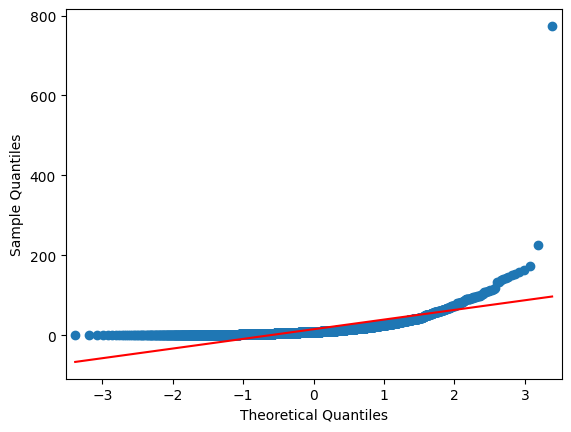

In [12]:
# QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

qqplot(df_v1['Actual_river_slope'], line='s')
pyplot.show()